จากชุดข้อมูล student_score.csv และ TestDuration.csv ให้นิสิตแสดงการเขียนโค้ดเพื่อทำ data wrangling และทำการ plot ให้ได้ดังรูปต่อไปนี้

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

####  
### ตอนที่ 1: ชุดข้อมูล student_score.csv

In [4]:
df_score = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/student_score.csv")
df_score.head()

,ID,stat,math,comp,sec
0,ID-1,45.97,26.52,52.62,1
1,ID-2,40.05,17.13,42.89,1
2,ID-3,38.24,42.57,36.44,1
3,ID-4,40.64,16.69,43.22,1
4,ID-5,51.72,43.76,45.19,1


In [5]:
df_score = pd.read_csv("student_score.csv")
df_score.head()

,ID,stat,math,comp,sec
0,ID-1,45.97,26.52,52.62,1
1,ID-2,40.05,17.13,42.89,1
2,ID-3,38.24,42.57,36.44,1
3,ID-4,40.64,16.69,43.22,1
4,ID-5,51.72,43.76,45.19,1


\
**1.1. จงแสดงวิธีการให้ได้มาซึ่งกราฟดังรูป**  
  
ข้อแนะนำ  
- ควรสร้างตัวแปรเพื่อเก็บ plot object ไว้ก่อน เช่น  
  g=sns.jointplot(...)  
  จากนั้นจึงจะสามารถใช้ g.ax_joint.axhline(...) และ g.ax_joint.axvline(...) ได้  ข้อนี้หากใช้ plt.axhline(...) และ plt.axvline(...) จะไม่ปรากฏเส้นบนกราฟ

ex4_plot1.svg

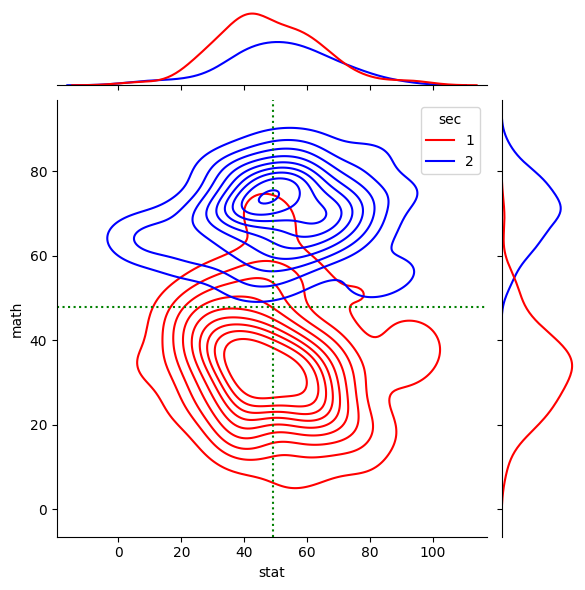

In [6]:
# Your code
g = sns.jointplot(
    data=df_score,
    x='stat', y='math',      # ดูความสัมพันธ์ระหว่างคะแนน Stat กับ Math
    hue='sec',               # แยกสีตาม Section (เช่น ห้อง 1 สีแดง, ห้อง 2 สีน้ำเงิน)
    kind='kde',              # ***จุดสำคัญ*** (อ่านอธิบายด้านล่าง)
    palette=['red', 'blue'])  # กำหนดสีเอง
#plt.axhline(df_score.math.mean())

g.ax_joint.axhline(y=df_score.math.mean(),
            c='g',
            ls=':')

g.ax_joint.axvline(x=df_score.stat.mean(),
            c='g',
            ls=':')

\
**1.2. จงแสดงวิธีการให้ได้มาซึ่งกราฟดังรูป**  
พร้อมกับพิมพ์อธิบายว่าวิชาใดคะแนนของนิสิตต่างหมู่ (sec) มีความแตกต่างกันอย่างชัดเจน หากข้อสอบที่ใช้กับแต่ละหมู่เป็นข้อสอบคนละชุดให้นิสิตคาดการณ์ถึงสาเหตุที่ส่งผลให้นิสิตต่างหมู่มีคะแนนต่างกันอย่างชัดเจน  
  
ข้อแนะนำ  
- อาจต้องมีการแปลงข้อมูลให้อยู่ในรูปแบบที่สามารถใช้คำสั่ง plot ได้ง่ายขึ้น เช่น จากคอลัมน์ 'stat','math','comp' ทำอย่างไรให้มารวมอยู่ในคอลัมน์เดียวโดยตั้งชื่อว่า Subject โดยมีอีกคอลัมน์ชื่อ Score สำหรับเก็บคะแนนวิชานั้นๆ (นิสิตลองศึกษา https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

ex4_plot2.svg

,ID,sec,Subject,Score
0,ID-1,1,stat,45.97
1,ID-2,1,stat,40.05
2,ID-3,1,stat,38.24
3,ID-4,1,stat,40.64
4,ID-5,1,stat,51.72
...,...,...,...,...
595,ID-196,2,comp,70.96
596,ID-197,2,comp,88.73
597,ID-198,2,comp,63.27
598,ID-199,2,comp,67.04


<Axes: xlabel='Subject', ylabel='Score'>

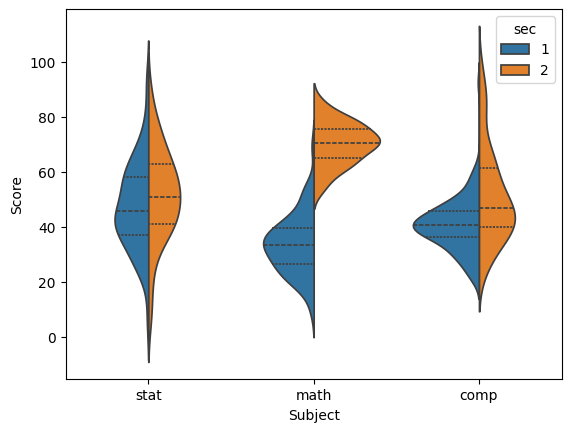

In [7]:
# Your code
df_score_melt = df_score.melt(value_vars=['stat','math','comp'],
                              id_vars=['ID', 'sec'],
                              var_name='Subject',
                              value_name='Score')
display(df_score_melt)
#see https://pandas.pydata.org/docs/reference/api/pandas.melt.html

sns.violinplot(data=df_score_melt,
               y='Score',
               x='Subject',
               hue='sec',
               split=True,
               inner='quartile',
               palette='tab10'
               )

In [9]:
df_score.head()

,ID,stat,math,comp,sec
0,ID-1,45.97,26.52,52.62,1
1,ID-2,40.05,17.13,42.89,1
2,ID-3,38.24,42.57,36.44,1
3,ID-4,40.64,16.69,43.22,1
4,ID-5,51.72,43.76,45.19,1


,ID,sec,Subject,Score
0,ID-1,1,stat,45.97
1,ID-2,1,stat,40.05
2,ID-3,1,stat,38.24
3,ID-4,1,stat,40.64
4,ID-5,1,stat,51.72
...,...,...,...,...
595,ID-196,2,comp,70.96
596,ID-197,2,comp,88.73
597,ID-198,2,comp,63.27
598,ID-199,2,comp,67.04


<Axes: xlabel='Subject', ylabel='Score'>

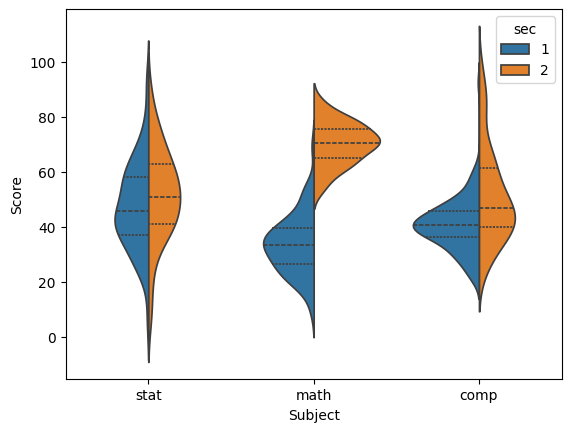

In [8]:
# --- ส่วนที่ 1: เตรียมข้อมูล (Data Preparation) ---
# ใช้คำสั่ง melt เพื่อแปลงข้อมูลจาก "แนวกว้าง" (Wide Format: วิชาละคอลัมน์)
# ให้เป็น "แนวลึก" (Long Format: วิชาทั้งหมดมารวมในคอลัมน์เดียว)
# เพื่อให้ Library Seaborn สามารถนำไปวาดกราฟได้ง่ายๆ
df_score_melt = df_score.melt(
    value_vars=['stat', 'math', 'comp'],  # รายชื่อคอลัมน์คะแนนวิชาที่จะนำมายุบรวมกัน
    id_vars=['ID', 'sec'],                # คอลัมน์ระบุตัวตน (เช่น รหัสนิสิต, หมู่เรียน) ที่ต้องการคงไว้เหมือนเดิม
    var_name='Subject',                   # ตั้งชื่อคอลัมน์ใหม่ที่จะเก็บ "ชื่อวิชา" (stat, math, comp จะมาอยู่ในนี้)
    value_name='Score'                    # ตั้งชื่อคอลัมน์ใหม่ที่จะเก็บ "คะแนน"
)

# แสดงผลลัพธ์เพื่อตรวจสอบว่าหน้าตาข้อมูลเปลี่ยนไปถูกต้องไหม
display(df_score_melt)
# อ่านเพิ่มเติม: https://pandas.pydata.org/docs/reference/api/pandas.melt.html


# --- ส่วนที่ 2: วาดกราฟ (Visualization) ---
# ใช้ Violin plot เพื่อดูการกระจายตัว (Distribution) ของข้อมูล
sns.violinplot(
    data=df_score_melt,   # ใช้ข้อมูลที่ melt มาแล้ว
    y='Score',            # แกน Y คือค่าคะแนน (ความสูงแสดงถึงคะแนนมาก/น้อย)
    x='Subject',          # แกน X คือวิชา (แยกเป็น 3 กลุ่ม: stat, math, comp)
    hue='sec',            # แบ่งสีตามหมู่เรียน (sec)
    split=True,           # ***สำคัญ*** รวม 2 sec ไว้ในไวโอลินตัวเดียวกัน (ซ้าย=sec1, ขวา=sec2) เพื่อให้เทียบง่าย
    inner='quartile',     # วาดเส้นประข้างในแสดงค่า Quartile (Q1, Median, Q3)
    palette='tab10'       # เลือกชุดสี (Color Palette)
)

####  
### ตอนที่ 2: ชุดข้อมูล TestDuration.csv

\
**2.1. จงแสดงวิธีการให้ได้มาซึ่งกราฟดังรูป**  
  
ข้อแนะนำ  
- Duration_mins หมายถึงช่วงเวลาตั้งแต่ Start ถึง End ในหน่วยนาที ดังนั้นต้องหาวิธีในการจัดการข้อมูลเวลา
- อาจพิจารณาใช้ total_seconds() ประกอบการคำนวณ https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html

ex4_plot3.svg

In [11]:
df_test = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/TestDuration.csv")
df_test = pd.read_csv("TestDuration.csv")
df_test.head()


,Student ID,Group,Gender,Start,End
0,1,A,F,13:00,15:05
1,2,A,M,14:10,16:00
2,3,C,M,12:50,14:23
3,4,B,F,9:15,10:45
4,5,A,M,13:05,16:25


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Student ID  30 non-null     int64 
 1   Group       30 non-null     object
 2   Gender      30 non-null     object
 3   Start       30 non-null     object
 4   End         30 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.3+ KB


In [13]:
# --- ขั้นตอนที่ 1: แปลงข้อมูลเวลา (Data Conversion) ---
# ข้อมูลเดิมเป็น String รูปแบบ "HH:MM" (เช่น "13:00") ซึ่ง pd.to_timedelta บางทีอ่านไม่เคลียร์
# จึงต้องเอา string ':00' (วินาที) ไปต่อท้ายก่อน ให้กลายเป็น "13:00:00" (HH:MM:SS)
# จากนั้นใช้ pd.to_timedelta แปลงให้เป็น "ระยะเวลาที่ผ่านไปจากเที่ยงคืน" (Timedelta)
df_test.Start = pd.to_timedelta(df_test.Start + ':00')
df_test.End = pd.to_timedelta(df_test.End + ':00')


In [ ]:
df_test.Start.iloc[-1] # แสดงค่าเวลาเริ่มต้นของแถวสุดท้าย

Timedelta('0 days 15:35:00')

In [20]:
# --- ขั้นตอนที่ 2: คำนวณระยะเวลาสอบ (Calculation) ---
# เมื่อทั้ง Start และ End เป็นชนิด Timedelta แล้ว สามารถนำมาลบกันได้เลย
# ผลลัพธ์จะได้เป็นระยะห่างระหว่างเวลาจบกับเวลาเริ่ม (Duration)
df_test['Duration'] = df_test.End - df_test.Start

# แสดงผลลัพธ์ 5 แถวแรกเพื่อตรวจสอบความถูกต้อง
df_test.head()

,Student ID,Group,Gender,Start,End,Duration
0,1,A,F,0 days 13:00:00,0 days 15:05:00,0 days 02:05:00
1,2,A,M,0 days 14:10:00,0 days 16:00:00,0 days 01:50:00
2,3,C,M,0 days 12:50:00,0 days 14:23:00,0 days 01:33:00
3,4,B,F,0 days 09:15:00,0 days 10:45:00,0 days 01:30:00
4,5,A,M,0 days 13:05:00,0 days 16:25:00,0 days 03:20:00


In [21]:
# --- แปลงระยะเวลาเป็นนาที (Unit Conversion) ---
# ใช้ List Comprehension วนลูปเข้าไปในทุกๆ แถวของคอลัมน์ Duration (ตั้งชื่อตัวแปรชั่วคราวว่า du)
# du.total_seconds() : คำสั่งดึงค่าเวลาทั้งหมดออกมาเป็น "วินาที" (เช่น 2 ชม. 5 นาที = 7500 วินาที)
# / 60 : นำวินาทีไปหาร 60 เพื่อแปลงเป็นหน่วย "นาที"
df_test['Duration_mins'] = [du.total_seconds()/60 for du in df_test.Duration]

# แสดงผลเพื่อดูคอลัมน์ใหม่ที่ได้ (จะเป็นตัวเลขทศนิยม เช่น 125.0 นาที)
df_test.head()

,Student ID,Group,Gender,Start,End,Duration,Duration_mins
0,1,A,F,0 days 13:00:00,0 days 15:05:00,0 days 02:05:00,125.0
1,2,A,M,0 days 14:10:00,0 days 16:00:00,0 days 01:50:00,110.0
2,3,C,M,0 days 12:50:00,0 days 14:23:00,0 days 01:33:00,93.0
3,4,B,F,0 days 09:15:00,0 days 10:45:00,0 days 01:30:00,90.0
4,5,A,M,0 days 13:05:00,0 days 16:25:00,0 days 03:20:00,200.0


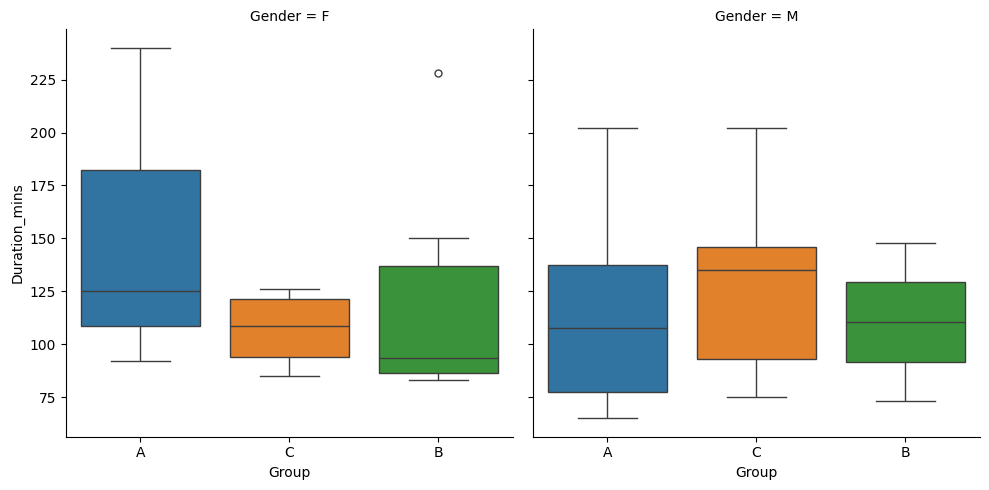

In [23]:
# ใช้ catplot (Categorical Plot) ซึ่งเป็นฟังก์ชันใหญ่ที่สร้างกราฟแยกย่อย (Subplots) ได้ง่าย
sns.catplot(
    data=df_test,       # ข้อมูลที่ใช้
    x='Group',          # แกน X ให้แยกตามกลุ่ม (Group A, B, C...)
    y='Duration_mins',  # แกน Y คือระยะเวลาสอบ (นาที) เพื่อดูว่ากลุ่มไหนสอบนาน/เร็ว
    kind='box',         # ***สำคัญ*** เลือกชนิดกราฟเป็น Box Plot (ดูการกระจายตัว, ค่ามัธยฐาน)
    hue='Group',        # ใส่สีให้แต่ละแท่งตามกลุ่ม (เหมือนแกน X) เพื่อความสวยงาม/แยกแยะง่าย
    col='Gender'        # ***ทีเด็ด*** แยกกราฟเป็น 2 ช่องซ้าย-ขวา ตามเพศ (Gender)
)